In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
dt=pd.read_csv(r"C:\Users\hp\Downloads\Churn_Modelling.csv")
dt.shape

(10000, 14)

In [23]:
dt.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
dt

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
dt.duplicated().sum()         ## No duplicated row.

np.int64(0)

In [25]:
dt.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [26]:
dt['Exited'].value_counts()        ### Suggest that it is becoming the imbalance classification problem.

Exited
0    7963
1    2037
Name: count, dtype: int64

In [27]:
dt=pd.get_dummies(dt,columns=["Geography","Gender"],drop_first=True,dtype=int)
dt

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [28]:
X=dt.drop(columns=['Exited'])
y=dt['Exited']

from sklearn.model_selection import train_test_split
# Here , sklearn - is ML library , model_selection- module, train_test-split- function
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain_scaled=scaler.fit_transform(Xtrain)
Xtest_scaled=scaler.transform(Xtest)

In [32]:
## Model Building

## keras has 2 types of models, one is sequential and another is non-sequential. 
# We will make sequential model here.

# Create  model
model= Sequential() 

# Adding layers
model.add(Dense(11,activation='relu',input_dim=11))  #Input layer
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   ## Output layer.

model.summary() 

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
## Model compilation
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# model fitting
hist=model.fit(Xtrain_scaled,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6897 - loss: 0.5955 - val_accuracy: 0.8037 - val_loss: 0.5063
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4692 - val_accuracy: 0.8181 - val_loss: 0.4593
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.4384 - val_accuracy: 0.8250 - val_loss: 0.4367
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8223 - loss: 0.4213 - val_accuracy: 0.8344 - val_loss: 0.4184
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.4064 - val_accuracy: 0.8381 - val_loss: 0.4014
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3927 - val_accuracy: 0.8431 - val_loss: 0.3874
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3804 - val_accuracy: 0.8487 - val_loss: 0.3759
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.3702 - val_accu

In [40]:
model.layers[0].get_weights()

[array([[-0.41793486, -0.05351948,  0.39542216,  0.12962912, -0.12428476,
         -0.0050732 ,  0.25348058,  0.2657534 , -0.03560847, -0.35466895,
         -0.5199074 ],
        [ 0.07867802,  0.00926644, -0.3871166 ,  0.23419437,  0.39884427,
         -0.83891255, -0.1253687 ,  0.87438536, -0.6120789 ,  0.04504918,
          0.7324522 ],
        [-0.7461988 , -0.03826194, -0.29952556,  0.71805286, -0.48248494,
         -0.00215813, -0.07016187,  0.09798102,  0.04089968, -0.07491439,
         -0.36147523],
        [-0.35737053,  0.18277791, -0.24262674, -0.2246221 ,  0.02198815,
         -0.10206102, -0.49844536,  0.2659092 ,  0.08972204, -0.37559515,
         -0.26004723],
        [ 0.01064527,  1.0681063 ,  0.5965574 ,  0.24306205, -0.00546893,
          0.03429864, -0.664367  ,  0.25780252,  0.24713339, -1.0066344 ,
         -0.3506532 ],
        [ 0.636486  ,  0.03655274, -0.5583214 ,  0.5389205 ,  0.0639826 ,
          0.0447169 ,  0.00494205, -0.11452673, -0.22587267,  0.0079274

In [41]:
y_log=model.predict(Xtest_scaled)

## Actually we will get prediction as probability and not as 0 or 1. Because we used sigmoid function. 
# To convert it to 0 or 1 we have to decide threshold which is generally decided by using ROC and AUC curve 
# But, for now we consider 0.5 as threshold 

y_pred=np.where(y_log>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2000, 1))

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.8665

Text(0.5, 1.0, 'Loss')

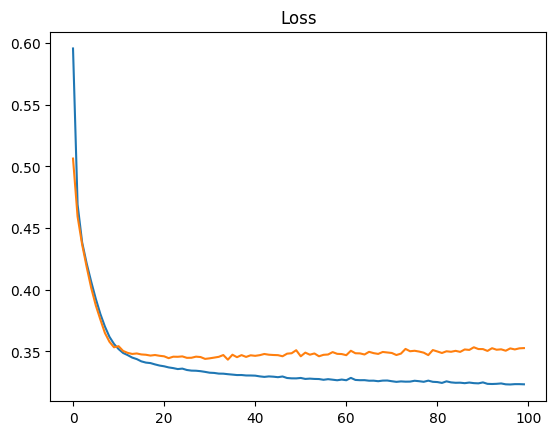

In [45]:
dict_info=hist.history

import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(dict_info['val_loss'])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

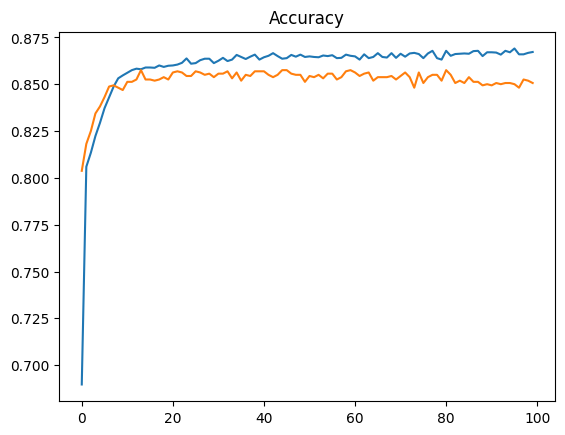

In [46]:
plt.plot(hist.history['accuracy'])
plt.plot(dict_info['val_accuracy'])
plt.title("Accuracy")